# Imports

In [1]:
from keras.datasets import mnist
import numpy as np
from matplotlib.pyplot import plot as plt
import sys

# Standardization

In [2]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

# Prediction

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def predict(X, W, B):
    pred = sigmoid(np.dot(X, W) + B)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

# Cost Function

In [5]:
def cost(y, y_hat):
    return np.mean(-y * np.log(y_hat + sys.float_info.min) - (1 - y) * np.log(1 - y_hat + sys.float_info.min))

# Train

In [6]:
def train(X, y, learning_rate, epochs):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        db = np.mean(y_hat - y)
        W -= learning_rate * dW
        B -= learning_rate * db
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Test

In [7]:
def test(X, y, W, b):
    y_hat = predict(X, W, b)
    return accuracy(y, y_hat)

# Accuracy

In [8]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

# Loading the data

In [9]:
trainSet, testSet = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Get the class 0 and class 1

In [10]:
xTrain = trainSet[0].astype('float32')
yTrain = trainSet[1].astype('int32')
xTrain = xTrain.reshape(xTrain.shape[0], -1)
xTrain = np.concatenate([xTrain[yTrain == 0], xTrain[yTrain == 1]])
yTrain = np.concatenate([yTrain[yTrain == 0], yTrain[yTrain == 1]])
xTrain = standardize(xTrain)

p = np.random.permutation(len(xTrain))
xTrain = xTrain[p]
yTrain = yTrain[p]

k = 10
iterations = 1000

# K-Fold Cross Validation

In [11]:
def k_fold_cross_validation(X, y, K, lr, epochs):
    fold_size = len(X) // K
    accuracies = []
    for i in range(K):
        # Divide the data into training and testing sets
        X_train = np.concatenate([X[:i * fold_size], X[(i + 1) * fold_size:]])
        Y_train = np.concatenate([y[:i * fold_size], y[(i + 1) * fold_size:]])
        X_test = X[i * fold_size:(i + 1) * fold_size]
        Y_test = y[i * fold_size:(i + 1) * fold_size]
        # Train the model
        print(f"\nTraining at Iteration {i + 1} of {K}")
        w, b, Costs = train(X_train, Y_train, lr, epochs)
        # Test the model
        print(f"\nTesting at Iteration {i + 1} of {K}")
        acc = test(X_test, Y_test, w, b)
        print(f"Accuracy at Iteration {i + 1} of {K}: {acc}")
        accuracies.append(acc)
    return np.mean(accuracies), Costs, w, b

# Running Code

## At Learning Rate 0.1

----------K-Fold Cross Validation with 10 Folds and eta 0.1----------

Training at Iteration 1 of 10
Cost at epoch 0: 666.8832325001952
Cost at epoch 100: 13.361279935471249
Cost at epoch 200: 6.960294664059442
Cost at epoch 300: 5.2823664861165405
Cost at epoch 400: 4.163747700821273
Cost at epoch 500: 3.4180018439577613
Cost at epoch 600: 2.796546963238169
Cost at epoch 700: 2.6722559870942506
Cost at epoch 800: 2.423674034806413
Cost at epoch 900: 2.1750920825185758

Testing at Iteration 1 of 10
Accuracy at Iteration 1 of 10: 0.9984202211690363

Training at Iteration 2 of 10
Cost at epoch 0: 655.8834811114583
Cost at epoch 100: 13.236988959327329
Cost at epoch 200: 6.587421735627686
Cost at epoch 300: 4.598766117324988
Cost at epoch 400: 3.853020260461477
Cost at epoch 500: 3.480147332029721
Cost at epoch 600: 3.169419891669925
Cost at epoch 700: 2.6101104990222908
Cost at epoch 800: 2.1129465944466164
Cost at epoch 900: 1.9265101302307386

Testing at Iteration 2 of 10
Accuracy at I

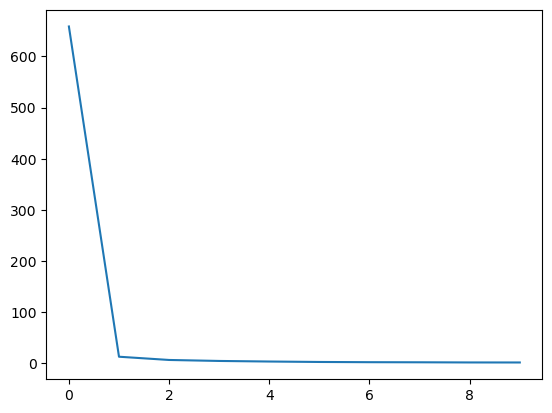

In [12]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.1----------")
average_accuracy, c, w, b = k_fold_cross_validation(xTrain, yTrain, k, 0.1, iterations)
print("\nAverage Accuracy: ", average_accuracy)
print("\nWeights: ", w)
print("\nBias: ", b)
plt(c)

## At Learning Rate 0.01

----------K-Fold Cross Validation with 10 Folds and eta 0.01----------

Training at Iteration 1 of 10
Cost at epoch 0: 660.9172656452871
Cost at epoch 100: 174.93954892256542
Cost at epoch 200: 70.22440152131401
Cost at epoch 300: 44.49616945952286
Cost at epoch 400: 32.81281770199451
Cost at epoch 500: 26.163250478294866
Cost at epoch 600: 21.750920825185755
Cost at epoch 700: 18.70579190965975
Cost at epoch 800: 16.28211787485334
Cost at epoch 900: 14.914917137270233

Testing at Iteration 1 of 10
Accuracy at Iteration 1 of 10: 0.9849921011058452

Training at Iteration 2 of 10
Cost at epoch 0: 654.2055529335155
Cost at epoch 100: 179.10329662338668
Cost at epoch 200: 73.4559669010559
Cost at epoch 300: 45.49049726867421
Cost at epoch 400: 33.30998160657018
Cost at epoch 500: 25.97681401407899
Cost at epoch 600: 21.6887753371138
Cost at epoch 700: 18.51935544544387
Cost at epoch 800: 16.90357275557293
Cost at epoch 900: 14.852771649198273

Testing at Iteration 2 of 10
Accuracy at Itera

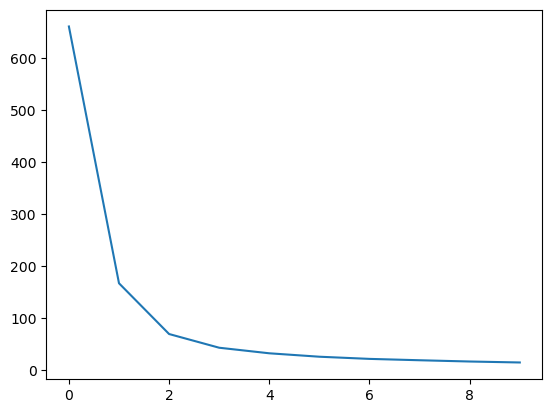

In [13]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.01----------")
average_accuracy, c, w, b = k_fold_cross_validation(xTrain, yTrain, k, 0.01, iterations)
print("\nAverage Accuracy: ", average_accuracy)
print("\nWeights: ", w)
print("\nBias: ", b)
plt(c)

## At Learning Rate 0.001

----------K-Fold Cross Validation with 10 Folds and eta 0.001----------

Training at Iteration 1 of 10
Cost at epoch 0: 660.1093743003516
Cost at epoch 100: 633.2003779651933
Cost at epoch 200: 589.3256633863899
Cost at epoch 300: 528.9823944685174
Cost at epoch 400: 458.13653806648387
Cost at epoch 500: 386.7313722718027
Cost at epoch 600: 324.7101751759873
Cost at epoch 700: 273.1915655643331
Cost at epoch 800: 233.04558026984736
Cost at epoch 900: 202.65643660265928

Testing at Iteration 1 of 10
Accuracy at Iteration 1 of 10: 0.7432859399684044

Training at Iteration 2 of 10
Cost at epoch 0: 659.7365013719199
Cost at epoch 100: 630.9009949065307
Cost at epoch 200: 586.1562434947201
Cost at epoch 300: 524.3836283511926
Cost at epoch 400: 448.4418419272582
Cost at epoch 500: 379.8332230958152
Cost at epoch 600: 315.2019155009775
Cost at epoch 700: 262.06752319945235
Cost at epoch 800: 222.4187018095423
Cost at epoch 900: 191.34595777356267

Testing at Iteration 2 of 10
Accuracy at Ite

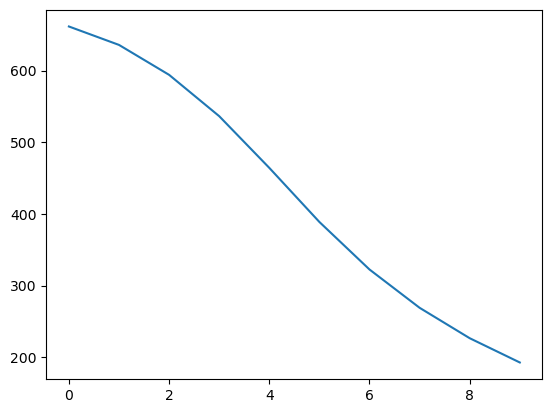

In [14]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.001----------")
average_accuracy, c, w, b = k_fold_cross_validation(xTrain, yTrain, k, 0.001, iterations)
print("\nAverage Accuracy: ", average_accuracy)
print("\nWeights: ", w)
print("\nBias: ", b)
plt(c)

## At Learning Rate 0.0001

----------K-Fold Cross Validation with 10 Folds and eta 0.0001----------

Training at Iteration 1 of 10
Cost at epoch 0: 661.9115934544384
Cost at epoch 100: 660.1093743003516
Cost at epoch 200: 657.7478457536172
Cost at epoch 300: 655.2620262307388
Cost at epoch 400: 653.0869341482203
Cost at epoch 500: 650.3525326730539
Cost at epoch 600: 648.1774405905354
Cost at epoch 700: 646.0644939960888
Cost at epoch 800: 643.3922380089946
Cost at epoch 900: 639.9742361650368

Testing at Iteration 1 of 10
Accuracy at Iteration 1 of 10: 0.08688783570300158

Training at Iteration 2 of 10
Cost at epoch 0: 659.674355883848
Cost at epoch 100: 656.6292269683219
Cost at epoch 200: 653.7705345170118
Cost at epoch 300: 650.8496965776296
Cost at epoch 400: 648.3638770547512
Cost at epoch 500: 645.3187481392254
Cost at epoch 600: 642.9572195924909
Cost at epoch 700: 639.6013632366049
Cost at epoch 800: 636.4940888330071
Cost at epoch 900: 632.5789230844736

Testing at Iteration 2 of 10
Accuracy at Iterati

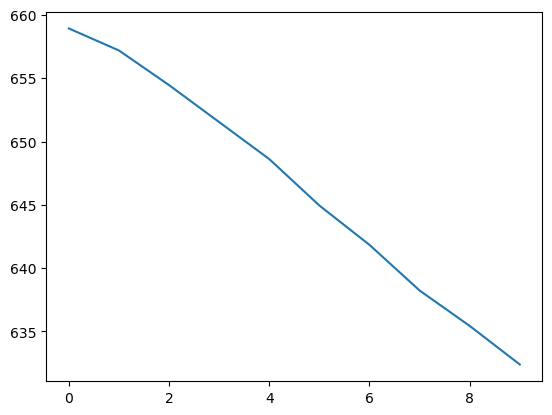

In [15]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.0001----------")
average_accuracy, c, w, b = k_fold_cross_validation(xTrain, yTrain, k, 0.0001, iterations)
print("\nAverage Accuracy: ", average_accuracy)
print("\nWeights: ", w)
print("\nBias: ", b)
plt(c)